Titanic dataset classification

reading the dataset

In [1]:
import pandas as pd
import numpy as numpy
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv("train_titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
# checking duplicated data
df.duplicated().sum()

0

seperating x and y in dataset

In [11]:
x=df.drop(columns=["PassengerId","Name","Ticket","Cabin","Survived"])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [13]:
y=df[["Survived"]]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


Seperate cat and con data in x

In [14]:
cat=list(x.columns[x.dtypes=="object"])
cat

['Sex', 'Embarked']

In [15]:
con=list(x.columns[x.dtypes!="object"])
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Create a Preprocessing pipeline

In [17]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [18]:
# create numerical Pipeline

num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy="median")),
                         ('scaler',StandardScaler())])


In [19]:

# create categorical pipeline
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy="most_frequent")),
                         ('ohe',OneHotEncoder(handle_unknown="ignore"))])

In [20]:
pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)])

In [21]:
x_pre=pre.fit_transform(x)
x_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [22]:
cols=pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [23]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


Splitting the dataset

In [24]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape

(712, 10)

In [26]:
x_test.shape

(179, 10)

Model creation

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
cls=GradientBoostingClassifier(n_estimators=1,learning_rate=0.001,min_samples_split=5,max_depth=2)
cls.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2,
                           min_samples_split=5, n_estimators=1)

In [32]:
cls.score(x_train,y_train)

0.6235955056179775

In [33]:
cls.score(x_test,y_test)

0.5865921787709497

Hyperparameter tuning

In [34]:
params={
    "learning_rate":[0.01,0.05,0.1,0.2],
    "n_estimators":[10,50,100,200],
    "max_depth":[2,3,4,5,6,7],
    "min_samples_split":[5,6,7,8,9,10]
    }

In [35]:
from sklearn.model_selection import RandomizedSearchCV
model=GradientBoostingClassifier()
rscv=RandomizedSearchCV(model,param_distributions=params,cv=5,scoring="f1_macro")
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [36]:
rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 9,
 'max_depth': 7,
 'learning_rate': 0.1}

In [37]:
rscv.best_score_

0.8019514780783131

In [38]:
best_model=rscv.best_estimator_
best_model

GradientBoostingClassifier(max_depth=7, min_samples_split=9, n_estimators=10)

Evaluate model performance

In [39]:
best_model.score(x_train,y_train)

0.8960674157303371

In [40]:
best_model.score(x_test,y_test)

0.8268156424581006

Predict result

In [41]:
y_pred_tr=best_model.predict(x_train)
y_pred_tr[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [42]:
y_pred_ts=best_model.predict(x_test)
y_pred_ts[:5]

array([0, 0, 0, 1, 1], dtype=int64)

Display Confusion matrix


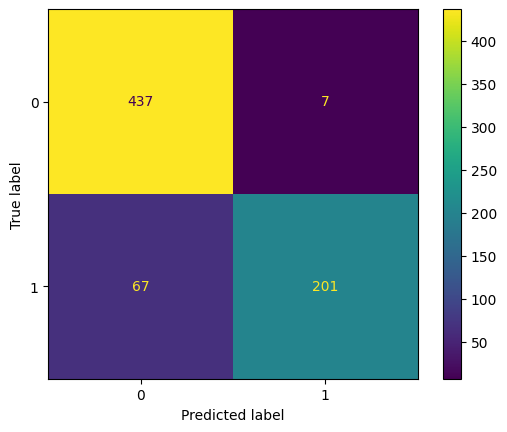

In [44]:
from sklearn.metrics import *
cm=confusion_matrix(y_train,y_pred_tr)
cmd=ConfusionMatrixDisplay(cm,display_labels=best_model.classes_)
cmd.plot()

Display Classification report

In [45]:
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       444
           1       0.97      0.75      0.84       268

    accuracy                           0.90       712
   macro avg       0.92      0.87      0.88       712
weighted avg       0.90      0.90      0.89       712



Predict new data


In [46]:
x_new=pd.read_csv("test_titanic.csv")
x_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
x_new_pre=pre.transform(x_new)
x_new_pre

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724,  1.35550962,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  1.        ,
         0.        ,  0.        ]])

In [48]:
x_new_pre=pd.DataFrame(x_new_pre,columns=cols)
x_new_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [49]:
pred=best_model.predict(x_new_pre)
pred[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [50]:
x_new["Predict"]=pred

In [51]:
x_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predict
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Display probabilities

In [52]:
prob=best_model.predict_proba(x_new_pre)
prob

array([[0.82783435, 0.17216565],
       [0.41555368, 0.58444632],
       [0.67697239, 0.32302761],
       [0.80009365, 0.19990635],
       [0.32695764, 0.67304236],
       [0.80009365, 0.19990635],
       [0.36044656, 0.63955344],
       [0.80325329, 0.19674671],
       [0.31392951, 0.68607049],
       [0.81548601, 0.18451399],
       [0.80009365, 0.19990635],
       [0.81572427, 0.18427573],
       [0.22142919, 0.77857081],
       [0.69151467, 0.30848533],
       [0.22148844, 0.77851156],
       [0.2258641 , 0.7741359 ],
       [0.81739695, 0.18260305],
       [0.67456002, 0.32543998],
       [0.58061135, 0.41938865],
       [0.39881985, 0.60118015],
       [0.71350255, 0.28649745],
       [0.55465511, 0.44534489],
       [0.22148844, 0.77851156],
       [0.70225486, 0.29774514],
       [0.22572034, 0.77427966],
       [0.82802524, 0.17197476],
       [0.221447  , 0.778553  ],
       [0.67456002, 0.32543998],
       [0.5869096 , 0.4130904 ],
       [0.77518057, 0.22481943],
       [0.

save output in file

In [53]:
x_new.to_csv("result.csv",index=False)